In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspecs
from sklearn.cluster import OPTICS

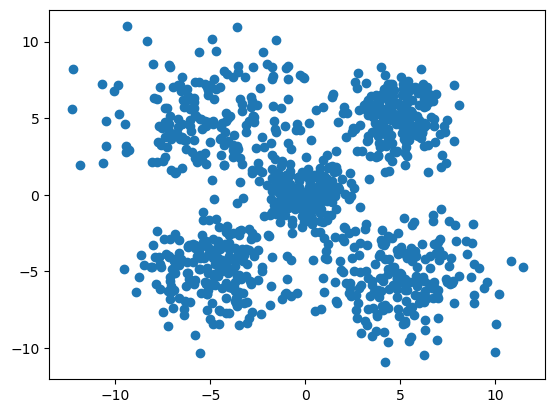

In [8]:
# Set the number of samples and features
n_samples = 1000
n_features = 2

# Create an empty array to store the data
data = np.empty((n_samples, n_features))

# Generate random data for each feature
for i in range(n_features):
    data[:, i] = np.random.normal(size=n_samples)

# Create 5 clusters with different densities and centroids
cluster1 = data[:200, :] + np.random.normal(size=(200, n_features), scale=0.5)
cluster2 = data[200:400, :] + np.random.normal(size=(200, n_features), scale=1) + np.array([5,5])
cluster3 = data[400:600, :] + np.random.normal(size=(200, n_features), scale=1.5) + np.array([-5,-5])
cluster4 = data[600:800, :] + np.random.normal(size=(200, n_features), scale=2) + np.array([5,-5])
cluster5 = data[800:, :] + np.random.normal(size=(200, n_features), scale=2.5) + np.array([-5,5])

# Combine the clusters into one dataset
X = np.concatenate((cluster1, cluster2, cluster3, cluster4, cluster5))

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [6]:
#Build OPTICS model:
clust = OPTICS(min_samples=3, min_cluster_size=100, metric='euclidean')

# Run the fit
clust.fit(X)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspecs.GridSpec(2, 3)
ax1 = plt.subplot(G[0, 0])
ax2 = plt.subplot(G[1, 0])


# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")


plt.tight_layout()
plt.show()

NameError: name 'gridspec' is not defined

<Figure size 1000x700 with 0 Axes>